# Epidemic Models

## The SIR-Model
The SIR-model (susceptible-infected-removed model) is an epidemic model which seperates the population into three sub-populations: Susceptible (S), Infected (I) and Recovered/Removed (R) individuals. Susceptible individuals get ill with some rate $\beta$ and Infected individuals recover or die with some rate $\gamma$. In the SIR model recovered individuals are not able to get infected by the disease, again. Thus, for the model it does not make a difference if the individual dies or recovers.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/SIR_Flow_Diagram.svg/1920px-SIR_Flow_Diagram.svg.png" alt="SIR model" width="1000" height="200">
This leads to the following ODE-system

$$
\begin{align}
    \frac{dS}{dt} &= - \beta \frac{IS}{N},\\
    \frac{dI}{dt} &= \beta \frac{IS}{N} -\gamma I,\\
    \frac{dR}{dt} &=  \gamma I.
\end{align}
$$

The behavior of the dyanmics strongly depends on the ratio $R_0 = \frac{\beta}{\gamma}$, the so called *basic reproduction number* (notice in class we denote $\gamma$ as $\alpha$, but there is no actual convention). This number describes how many individuals are infected per sick person. If $R_0 > 1$ an outbreak of the disease is called epidemic, if $R_0 < 1$ an outbreak of the disease is called endemic.



##  SIR-model on Networks
The model as it is written above does not use any information about the social behavior of individuals. For example, a social network follows a power-law distribution, i.e. that some nodes have a much higher degree than other. If an individual with a lot of social contacts (high degree) gets infected, this should change the bevior of the spreading. 

Consider a population with $N$ individuals where some fraction of the population is infected with some disease. Now, consider that at each time step $t_i$ each infected individual infects his neighbors with a probability $\beta$. There is also a probability $\gamma$ for this individual to convalesce in this timestep.This process is repeated.


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
def networked_SIR(G_, t_end, I_init, beta, gamma, p_vaccinated):

    t_end = t_end

    I_init = I_init

    beta = beta

    gamma = gamma

    p_vaccinated = p_vaccinated

    S_list = []
    I_list = []
    R_list = []


    node_states = np.random.choice(['S', 'I'], size=G_.number_of_nodes(), p=[1 - I_init, I_init])
    
    # Vaccinate a portion of the population randomly
    num_vaccinated = int(p_vaccinated * G_.number_of_nodes())
    vaccinated_nodes = np.random.choice(G_.nodes(), size  = num_vaccinated, replace=False)
    node_states[vaccinated_nodes] = 'R'

    for t in range(t_end):
        
        S_list.append(np.count_nonzero(node_states == 'S'))
        I_list.append(np.count_nonzero(node_states == 'I'))
        R_list.append(np.count_nonzero(node_states == 'R'))

        # Iterate through each node and update its state based on the SIR dynamics
        for node in G_.nodes():
            if node_states[node] == 'I': #check if neighbours of chosen node are susceptible and infect them with probability beta
                for neighbor in G_.neighbors(node):
                    if node_states[neighbor] == 'S' and np.random.random() < beta:
                        node_states[neighbor] = 'I'

                # Recover with probability gamma
                if np.random.random() < gamma:
                    node_states[node] = 'R'

    return S_list, I_list, R_list

A scale free network model like the Barabasi Albert model serves as a social network model that can be used for this model

In [8]:
G = nx.barabasi_albert_graph(5000,10) 

In [9]:
t_end = 100
I_init = 0.01
beta = 0.2
gamma = 0.1
p_vaccinated = 0.3
Slist, Ilist, Rlist = networked_SIR(G, t_end, I_init, beta, gamma, p_vaccinated)

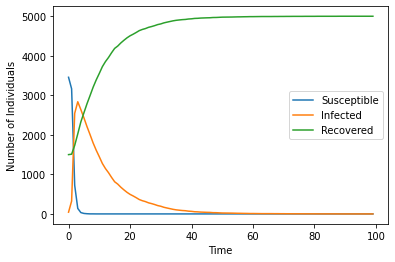

In [10]:
time_steps = range(t_end)
plt.plot(time_steps, Slist, label='Susceptible')
plt.plot(time_steps, Ilist, label='Infected')
plt.plot(time_steps, Rlist, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()